In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/AMZN.csv')
data

FileNotFoundError: [Errno 2] No such file or directory: '/content/AMZN.csv'

The data is from 1997 to 2023

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 0 to 6515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6516 non-null   object 
 1   Open       6516 non-null   float64
 2   High       6516 non-null   float64
 3   Low        6516 non-null   float64
 4   Close      6516 non-null   float64
 5   Adj Close  6516 non-null   float64
 6   Volume     6516 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 356.5+ KB


In [ ]:
data.dtypes #datetime is already in the desired format

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [ ]:
data["Date"] = pd.to_datetime(data["Date"])

In [ ]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


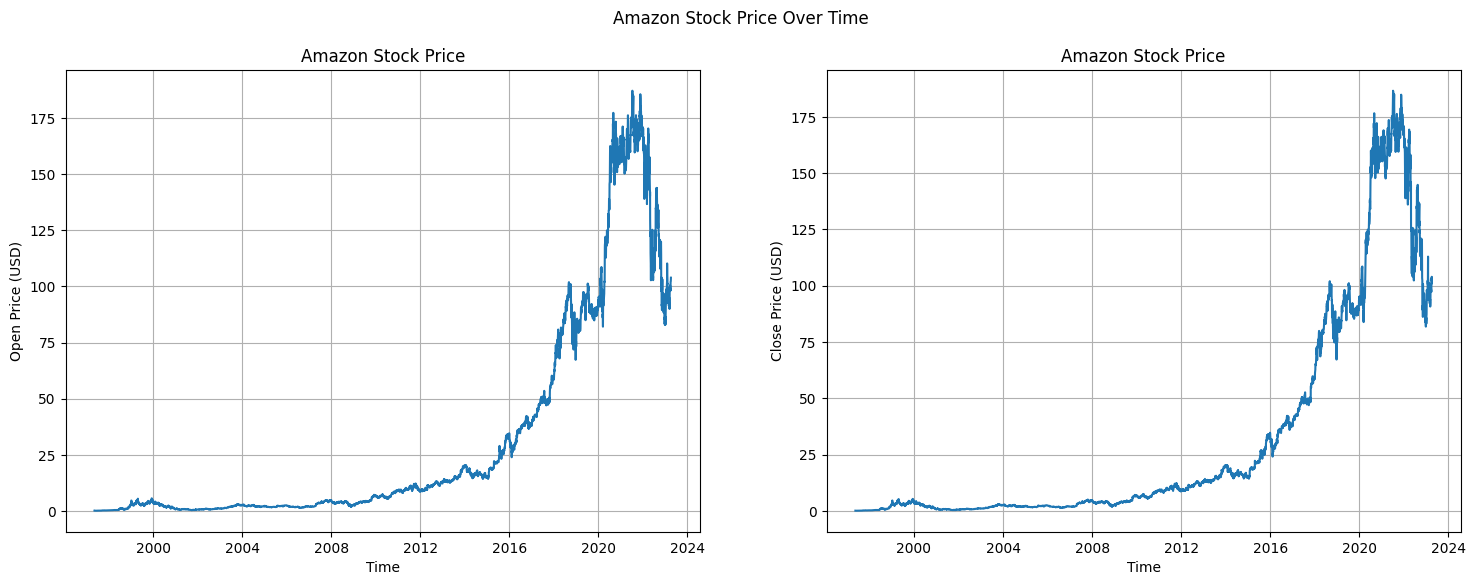

In [ ]:
# Just exploring the trend lines
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(data["Date"], data["Open"])
plt.xlabel("Time")
plt.ylabel("Open Price (USD)")
plt.title("Amazon Stock Price")
plt.grid()

plt.subplot(1,2,2)
plt.plot(data["Date"], data["Close"])
plt.xlabel("Time")
plt.ylabel("Close Price (USD)")
plt.title("Amazon Stock Price")
plt.grid()

plt.suptitle("Amazon Stock Price Over Time")
plt.show()

Stayed low and steady until around 2010, then took off like a rocket. The biggest surge happened between 2017 and 2021, likely thanks to e-commerce and cloud computing growth. After peaking in 2021, the stock dropped but still sits way higher than its early days.

In [ ]:
dfive = data[data["Date"].dt.year >= 2019]
dfive.shape

(1073, 7)

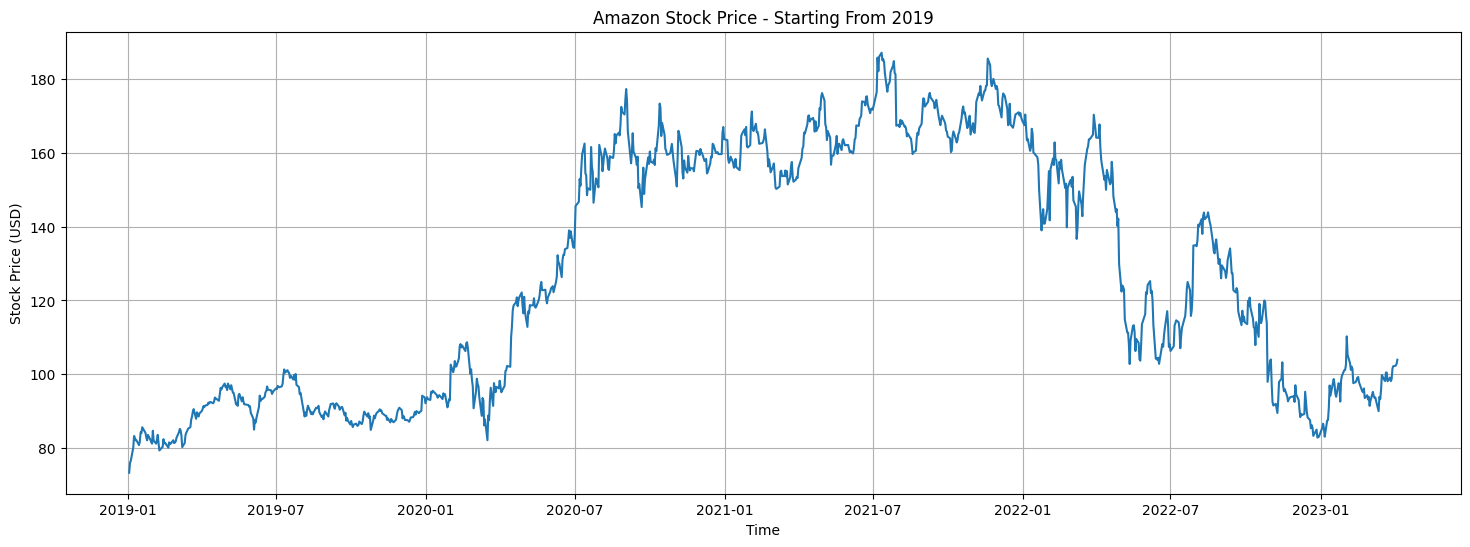

In [ ]:
# performance in the last five years
# I am thinking that five year data would be more than enough for our models.. What do you guys think?
plt.figure(figsize=(18,6))
plt.plot(dfive["Date"], dfive["Open"])
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.title("Amazon Stock Price - Starting From 2019")
plt.grid()

In [ ]:
%pip install ace_tools

In [ ]:
# Lets calculate Technical Indicators
# MACD
# Assuming dfive is already loaded and contains a 'Close' column
# Calculate 12-day and 26-day EMA
dfive = dfive.copy()  # Ensure we work with a fresh copy

dfive['EMA12'] = dfive['Close'].ewm(span=12, adjust=False).mean()
dfive['EMA26'] = dfive['Close'].ewm(span=26, adjust=False).mean()
dfive['MACD'] = dfive['EMA12'] - dfive['EMA26']
dfive['Signal_Line'] = dfive['MACD'].ewm(span=9, adjust=False).mean()


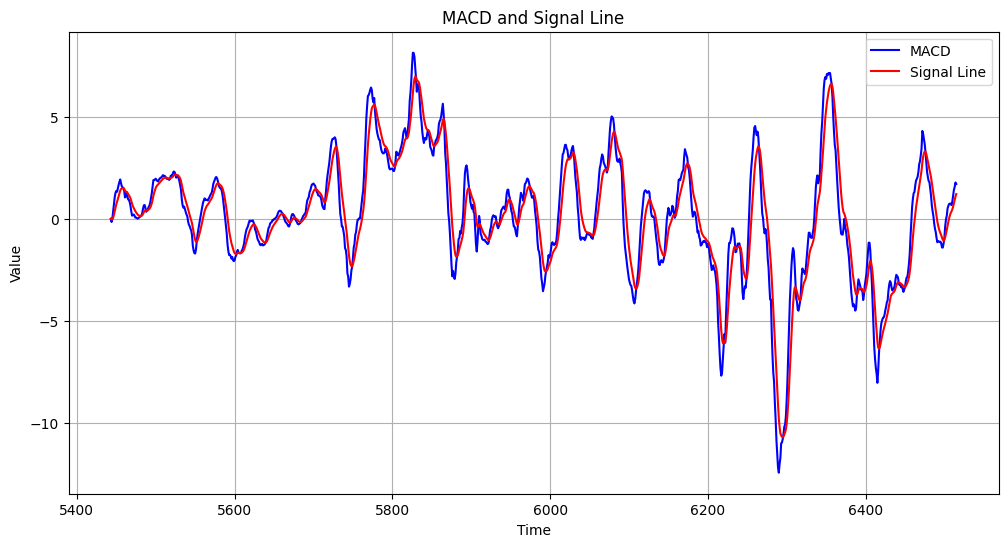

In [ ]:

# Plot MACD and Signal Line
plt.figure(figsize=(12, 6))
plt.plot(dfive['MACD'], label="MACD", color="blue")
plt.plot(dfive['Signal_Line'], label="Signal Line", color="red")
plt.title("MACD and Signal Line")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# **RSI**
Not working 😞

In [ ]:
# Calculate daily price changes
dfive['delta'] = dfive['Close'].diff(1)

# Display first 20 values
print(dfive[['Date', 'Close', 'delta']].head(20))

dfive['gain'] = np.where(dfive['delta'] > 0, dfive['delta'], 0)
dfive['loss'] = np.where(dfive['delta'] < 0, -dfive['delta'], 0)

# Print the first few rows
print(dfive[['Date', 'delta', 'gain', 'loss']].head(20))


           Date      Close     delta
5443 2019-01-02  76.956497       NaN
5444 2019-01-03  75.014000 -1.942497
5445 2019-01-04  78.769501  3.755501
5446 2019-01-07  81.475502  2.706001
5447 2019-01-08  82.829002  1.353500
5448 2019-01-09  82.971001  0.141999
5449 2019-01-10  82.810997 -0.160004
5450 2019-01-11  82.028000 -0.782997
5451 2019-01-14  80.860497 -1.167503
5452 2019-01-15  83.727997  2.867500
5453 2019-01-16  84.189003  0.461006
5454 2019-01-17  84.661003  0.472000
5455 2019-01-18  84.809998  0.148995
5456 2019-01-22  81.608498 -3.201500
5457 2019-01-23  82.000999  0.392501
5458 2019-01-24  82.746498  0.745499
5459 2019-01-25  83.528503  0.782005
5460 2019-01-28  81.894501 -1.634002
5461 2019-01-29  79.694000 -2.200501
5462 2019-01-30  83.521500  3.827500
           Date     delta      gain      loss
5443 2019-01-02       NaN  0.000000  0.000000
5444 2019-01-03 -1.942497  0.000000  1.942497
5445 2019-01-04  3.755501  3.755501  0.000000
5446 2019-01-07  2.706001  2.706001  0.

In [ ]:
dfive['avg_gain'] = dfive['gain'].rolling(window=14, min_periods=14).mean()
dfive['avg_loss'] = dfive['loss'].rolling(window=14, min_periods=14).mean()

print(dfive[['Date', 'gain', 'loss', 'avg_gain', 'avg_loss']].head(20))


           Date      gain      loss  avg_gain  avg_loss
5443 2019-01-02  0.000000  0.000000       NaN       NaN
5444 2019-01-03  0.000000  1.942497       NaN       NaN
5445 2019-01-04  3.755501  0.000000       NaN       NaN
5446 2019-01-07  2.706001  0.000000       NaN       NaN
5447 2019-01-08  1.353500  0.000000       NaN       NaN
5448 2019-01-09  0.141999  0.000000       NaN       NaN
5449 2019-01-10  0.000000  0.160004       NaN       NaN
5450 2019-01-11  0.000000  0.782997       NaN       NaN
5451 2019-01-14  0.000000  1.167503       NaN       NaN
5452 2019-01-15  2.867500  0.000000       NaN       NaN
5453 2019-01-16  0.461006  0.000000       NaN       NaN
5454 2019-01-17  0.472000  0.000000       NaN       NaN
5455 2019-01-18  0.148995  0.000000       NaN       NaN
5456 2019-01-22  0.000000  3.201500  0.850464  0.518179
5457 2019-01-23  0.392501  0.000000  0.878500  0.518179
5458 2019-01-24  0.745499  0.000000  0.931750  0.379429
5459 2019-01-25  0.782005  0.000000  0.719358  0

In [ ]:
dfive['avg_gain'] = dfive['gain'].rolling(window=14, min_periods=14).mean()
dfive['avg_loss'] = dfive['loss'].rolling(window=14, min_periods=14).mean()

print(dfive[['Date', 'gain', 'loss', 'avg_gain', 'avg_loss']].head(20))


           Date      gain      loss  avg_gain  avg_loss
5443 2019-01-02  0.000000  0.000000       NaN       NaN
5444 2019-01-03  0.000000  1.942497       NaN       NaN
5445 2019-01-04  3.755501  0.000000       NaN       NaN
5446 2019-01-07  2.706001  0.000000       NaN       NaN
5447 2019-01-08  1.353500  0.000000       NaN       NaN
5448 2019-01-09  0.141999  0.000000       NaN       NaN
5449 2019-01-10  0.000000  0.160004       NaN       NaN
5450 2019-01-11  0.000000  0.782997       NaN       NaN
5451 2019-01-14  0.000000  1.167503       NaN       NaN
5452 2019-01-15  2.867500  0.000000       NaN       NaN
5453 2019-01-16  0.461006  0.000000       NaN       NaN
5454 2019-01-17  0.472000  0.000000       NaN       NaN
5455 2019-01-18  0.148995  0.000000       NaN       NaN
5456 2019-01-22  0.000000  3.201500  0.850464  0.518179
5457 2019-01-23  0.392501  0.000000  0.878500  0.518179
5458 2019-01-24  0.745499  0.000000  0.931750  0.379429
5459 2019-01-25  0.782005  0.000000  0.719358  0

Since NaN values appear in the first 14 rows of avg_gain and avg_loss, the RSI calculation fails because RS = avg_gain / avg_loss becomes NaN. The solution is to:

Start computing RSI only after the 14th row (so the first values are skipped).
Use .fillna(method='bfill') to fill the first NaNs after calculation.

In [ ]:
def calculate_rsi_final(data, window=14):
    delta = data['Close'].diff()  # Compute daily price changes

    gain = np.where(delta > 0, delta, 0)  # Positive gains
    loss = np.where(delta < 0, -delta, 0)  # Negative losses

    # Compute Rolling Mean for Gain & Loss
    avg_gain = pd.Series(gain).rolling(window=window, min_periods=window).mean()
    avg_loss = pd.Series(loss).rolling(window=window, min_periods=window).mean()

    # Avoid division by zero errors
    avg_loss.replace(0, 1e-10, inplace=True)

    # Compute RSI
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi  # Ensure RSI starts after 14 days

# Apply RSI function
dfive['RSI'] = calculate_rsi_final(dfive)

# Display first few rows where RSI is computed
print(dfive[['Date', 'Close', 'RSI']].head(20))

# # Plot RSI
# plt.figure(figsize=(12, 5))
# plt.plot(dfive['RSI'], label='RSI', color='purple')
# plt.axhline(y=70, color='red', linestyle='dashed', label='Overbought (Sell)')
# plt.axhline(y=30, color='green', linestyle='dashed', label='Oversold (Buy)')
# plt.title('Relative Strength Index (RSI)')
# plt.xlabel('Time')
# plt.ylabel('RSI Value')
# plt.legend()
# plt.grid()
# plt.show()



           Date      Close  RSI
5443 2019-01-02  76.956497  NaN
5444 2019-01-03  75.014000  NaN
5445 2019-01-04  78.769501  NaN
5446 2019-01-07  81.475502  NaN
5447 2019-01-08  82.829002  NaN
5448 2019-01-09  82.971001  NaN
5449 2019-01-10  82.810997  NaN
5450 2019-01-11  82.028000  NaN
5451 2019-01-14  80.860497  NaN
5452 2019-01-15  83.727997  NaN
5453 2019-01-16  84.189003  NaN
5454 2019-01-17  84.661003  NaN
5455 2019-01-18  84.809998  NaN
5456 2019-01-22  81.608498  NaN
5457 2019-01-23  82.000999  NaN
5458 2019-01-24  82.746498  NaN
5459 2019-01-25  83.528503  NaN
5460 2019-01-28  81.894501  NaN
5461 2019-01-29  79.694000  NaN
5462 2019-01-30  83.521500  NaN


## **ROC**

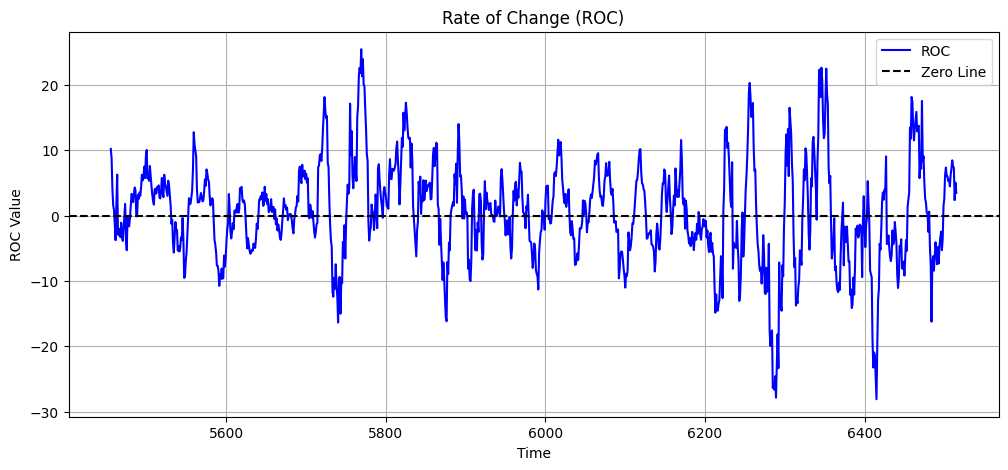

In [ ]:
# Compute ROC
def calculate_roc(data, window=12):
    roc = ((data['Close'] - data['Close'].shift(window)) / data['Close'].shift(window)) * 100
    return roc

# Apply RSI and ROC to the dataset
dfive['RSI'] = calculate_rsi(dfive)
dfive['ROC'] = calculate_roc(dfive)

# Plot ROC
plt.figure(figsize=(12, 5))
plt.plot(dfive['ROC'], label='ROC', color='blue')
plt.axhline(y=0, color='black', linestyle='dashed', label='Zero Line')
plt.title('Rate of Change (ROC)')
plt.xlabel('Time')
plt.ylabel('ROC Value')
plt.legend()
plt.grid()
plt.show()

## **Stochastic Oscillator (14-day period)**

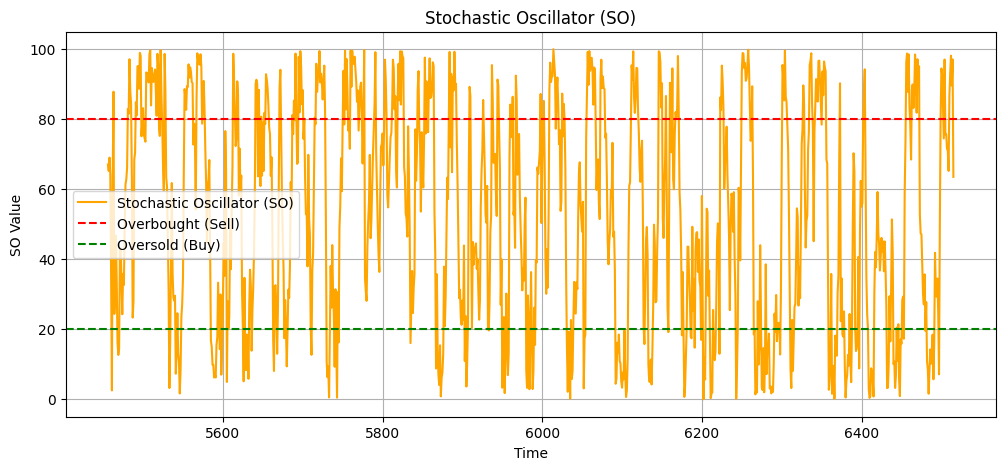

In [ ]:
# Compute Stochastic Oscillator (14-day period)
def calculate_stochastic_oscillator(data, window=14):
    low_min = data['Low'].rolling(window=window).min()  # Lowest low over 'window' days
    high_max = data['High'].rolling(window=window).max()  # Highest high over 'window' days
    sto = ((data['Close'] - low_min) / (high_max - low_min)) * 100  # STO Formula
    return sto

dfive['STO'] = calculate_stochastic_oscillator(dfive)

# Plot Stochastic Oscillator
plt.figure(figsize=(12, 5))
plt.plot(dfive['STO'], label='Stochastic Oscillator (SO)', color='orange')
plt.axhline(y=80, color='red', linestyle='dashed', label='Overbought (Sell)')
plt.axhline(y=20, color='green', linestyle='dashed', label='Oversold (Buy)')
plt.title('Stochastic Oscillator (SO)')
plt.xlabel('Time')
plt.ylabel('SO Value')
plt.legend()
plt.grid()
plt.show()

In [ ]:
dfive['ROC'].fillna(method='bfill', inplace=True)  # Fill missing ROC values
dfive['STO'].fillna(method='bfill', inplace=True)  # Fill missing STO values

# Check missing values again
print(dfive.isnull().sum())

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
EMA12             0
EMA26             0
MACD              0
Signal_Line       0
RSI            1073
ROC               0
STO               0
dtype: int64


<ipython-input-38-2c60d3d86422>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfive['ROC'].fillna(method='bfill', inplace=True)  # Fill missing ROC values
<ipython-input-38-2c60d3d86422>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfive['ROC'].fillna(method='bfill', inplace=True)  # Fill missing ROC values
<ipython-input-38-2c60d3d86422>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chaine

# **On-balance volume (OBV)**

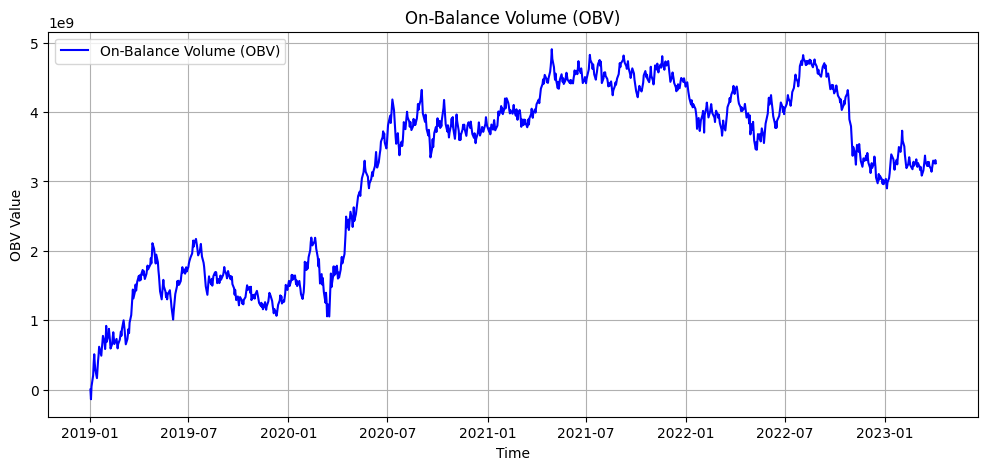

In [ ]:
def calculate_obv(data):
    obv = [0]  # Start OBV at zero
    for i in range(1, len(data)):
        if data['Close'].iloc[i] > data['Close'].iloc[i-1]:  # Price went up
            obv.append(obv[-1] + data['Volume'].iloc[i])
        elif data['Close'].iloc[i] < data['Close'].iloc[i-1]:  # Price went down
            obv.append(obv[-1] - data['Volume'].iloc[i])
        else:  # Price stayed the same
            obv.append(obv[-1])

    return obv

# Apply OBV calculation
dfive['OBV'] = calculate_obv(dfive)

# Plot OBV to visualize volume trends
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(dfive['Date'], dfive['OBV'], label='On-Balance Volume (OBV)', color='blue')
plt.title('On-Balance Volume (OBV)')
plt.xlabel('Time')
plt.ylabel('OBV Value')
plt.legend()
plt.grid()
plt.show()


### **Converting the indicators into symbols**

In [ ]:
# Function to categorize MACD
def categorize_macd(value):
    if value < 0:
        return "aMACD"  # Bearish
    elif value > 0:
        return "bMACD"  # Bullish
    else:
        return "cMACD"  # Neutral

# Function to categorize ROC
def categorize_roc(value):
    if value < 0:
        return "aROC"  # Downward Trend
    elif value > 0:
        return "bROC"  # Upward Trend
    else:
        return "cROC"  # No Change

# Function to categorize STO
def categorize_sto(value):
    if value >= 80:
        return "aSTO"  # Overbought
    elif value <= 20:
        return "bSTO"  # Oversold
    else:
        return "cSTO"  # Normal Range

# Function to categorize OBV
def categorize_obv(value, prev_value):
    if value > prev_value:
        return "bOBV"  # Upward Trend
    elif value < prev_value:
        return "aOBV"  # Downward Trend
    else:
        return "cOBV"  # Static

# Apply the conversion to the dataset
dfive['MACD_Symbol'] = dfive['MACD'].apply(categorize_macd)
dfive['ROC_Symbol'] = dfive['ROC'].apply(categorize_roc)
dfive['STO_Symbol'] = dfive['STO'].apply(categorize_sto)

In [ ]:
# Compute OBV Symbolic Values
dfive['OBV_Symbol'] = dfive['OBV'].diff().apply(lambda x: categorize_obv(x, 0))  # First value set as neutral
# Print first few rows
print(dfive[['Date', 'MACD_Symbol', 'ROC_Symbol', 'STO_Symbol', 'OBV_Symbol']].head(20))


           Date MACD_Symbol ROC_Symbol STO_Symbol OBV_Symbol
5443 2019-01-02       cMACD       bROC       cSTO       cOBV
5444 2019-01-03       aMACD       bROC       cSTO       aOBV
5445 2019-01-04       bMACD       bROC       cSTO       bOBV
5446 2019-01-07       bMACD       bROC       cSTO       bOBV
5447 2019-01-08       bMACD       bROC       cSTO       bOBV
5448 2019-01-09       bMACD       bROC       cSTO       bOBV
5449 2019-01-10       bMACD       bROC       cSTO       aOBV
5450 2019-01-11       bMACD       bROC       cSTO       aOBV
5451 2019-01-14       bMACD       bROC       cSTO       aOBV
5452 2019-01-15       bMACD       bROC       cSTO       bOBV
5453 2019-01-16       bMACD       bROC       cSTO       bOBV
5454 2019-01-17       bMACD       bROC       cSTO       bOBV
5455 2019-01-18       bMACD       bROC       cSTO       bOBV
5456 2019-01-22       bMACD       bROC       cSTO       aOBV
5457 2019-01-23       bMACD       bROC       cSTO       bOBV
5458 2019-01-24       bM

# **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

# Select relevant columns (technical indicators)
features = ['MACD_Symbol', 'ROC_Symbol', 'STO_Symbol', 'OBV_Symbol']
df_train, df_test = train_test_split(dfive, test_size=0.3, random_state=42, shuffle=True)

# Print dataset size
print(f"Training Data Size: {len(df_train)}, Testing Data Size: {len(df_test)}")
print(dfive.shape)

Training Data Size: 751, Testing Data Size: 322
(1073, 24)


In [ ]:
from mlxtend.frequent_patterns import fpgrowth

# Lower min_support to find patterns
min_support_value = 0.4  # You can adjust this (try 0.3 if still empty)
frequent_patterns = fpgrowth(df_fp_train, min_support=min_support_value, use_colnames=True)

# Check if patterns are found
if frequent_patterns.shape[0] == 0:
    print(f"No frequent patterns found with min_support = {min_support_value}. Try lowering further.")
else:
    print(f"Found {frequent_patterns.shape[0]} frequent patterns.")
    display(frequent_patterns)  # Works in Google Colab


Found 7 frequent patterns.


,support,itemsets
0,0.532623,(ROC_Symbol_bROC)
1,0.528628,(STO_Symbol_cSTO)
2,0.516644,(MACD_Symbol_bMACD)
3,0.478029,(OBV_Symbol_aOBV)
4,0.520639,(OBV_Symbol_bOBV)
5,0.482024,(MACD_Symbol_aMACD)
6,0.467377,(ROC_Symbol_aROC)


In [ ]:
print(f"Shape of frequent_patterns: {frequent_patterns.shape}")
print(f"Columns: {frequent_patterns.columns}")

# Check for missing values
print(frequent_patterns.isnull().sum())

# Display first few rows
print(frequent_patterns.head())


Shape of frequent_patterns: (7, 2)
Columns: Index(['support', 'itemsets'], dtype='object')
support     0
itemsets    0
dtype: int64
    support             itemsets
0  0.532623    (ROC_Symbol_bROC)
1  0.528628    (STO_Symbol_cSTO)
2  0.516644  (MACD_Symbol_bMACD)
3  0.478029    (OBV_Symbol_aOBV)
4  0.520639    (OBV_Symbol_bOBV)


In [ ]:
%pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.1 MB/s eta 0:00:00


In [ ]:

# Convert frequent pattern dataset into numpy array (Only cluster frequent patterns)
X = np.array(frequent_patterns[['support']])  # Use support values for clustering

# Ensure we have valid patterns for clustering
if X.shape[0] < 3:
    print("Not enough frequent patterns for clustering. Try reducing min_support further.")
else:
    # Set number of clusters = 3
    n_clusters = 3

    # Apply Fuzzy C-Means
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
        X.T, c=n_clusters, m=2, error=0.005, maxiter=1000
    )

    # Assign each pattern to the cluster with the highest membership
    frequent_patterns['Cluster'] = np.argmax(u, axis=0)

    # Display clustered patterns in Google Colab
    display(frequent_patterns)



,support,itemsets,Cluster
0,0.532623,(ROC_Symbol_bROC),2
1,0.528628,(STO_Symbol_cSTO),2
2,0.516644,(MACD_Symbol_bMACD),1
3,0.478029,(OBV_Symbol_aOBV),0
4,0.520639,(OBV_Symbol_bOBV),1
5,0.482024,(MACD_Symbol_aMACD),0
6,0.467377,(ROC_Symbol_aROC),0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Ensure only the frequent patterns dataset is used for training
X_train = pd.get_dummies(frequent_patterns.drop(columns=['Cluster']))  # Features from frequent patterns
y_train = frequent_patterns['Cluster']  # Labels (Cluster assignments)

# Convert test data to the same format
X_test = pd.get_dummies(df_test[['MACD_Symbol', 'ROC_Symbol', 'STO_Symbol', 'OBV_Symbol']])

# Ensure test dataset has the same columns as train dataset
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Predict stock trends
df_test['Predicted_Trend'] = knn.predict(X_test)

# Display final prediction results in Google Colab
display(df_test[['Date', 'Predicted_Trend']])


,Date,Predicted_Trend
6435,2022-12-08,0
6189,2021-12-16,0
6510,2023-03-29,0
5868,2020-09-09,0
5933,2020-12-10,0
...,...,...
5702,2020-01-13,0
5647,2019-10-23,0
5990,2021-03-05,0
6092,2021-07-30,0


In [ ]:
print(frequent_patterns['Cluster'].value_counts())


Cluster
0    3
2    2
1    2
Name: count, dtype: int64


# **Model Evaluation**

In [ ]:
# Map clusters to actual trend values
cluster_to_trend = {0: 3, 1: 2, 2: 1}  # {Cluster: Trend}
df_test['Predicted_Trend'] = df_test['Predicted_Trend'].map(cluster_to_trend)

# Display updated predictions
print(df_test[['Date', 'Predicted_Trend']].head(20))


           Date  Predicted_Trend
6435 2022-12-08                3
6189 2021-12-16                3
6510 2023-03-29                3
5868 2020-09-09                3
5933 2020-12-10                3
5813 2020-06-22                3
5556 2019-06-14                3
6015 2021-04-12                3
6157 2021-11-01                3
6259 2022-03-29                3
6236 2022-02-24                3
6416 2022-11-10                3
5513 2019-04-12                3
5905 2020-10-30                3
5494 2019-03-18                3
6343 2022-07-29                3
5805 2020-06-10                3
5900 2020-10-23                3
6411 2022-11-03                3
6442 2022-12-19                3


In [ ]:
# Define the actual trend based on closing price movement
df_test['Actual_Trend'] = 1  # Default: Static trend

df_test.loc[df_test['Close'].diff() > 0, 'Actual_Trend'] = 2  # Uptrend
df_test.loc[df_test['Close'].diff() < 0, 'Actual_Trend'] = 3  # Downtrend

# Display a preview of the updated test dataset
print(df_test[['Date', 'Close', 'Actual_Trend']].head(20))


           Date       Close  Actual_Trend
6435 2022-12-08   90.349998             1
6189 2021-12-16  168.871002             2
6510 2023-03-29  100.250000             3
5868 2020-09-09  163.430496             2
5933 2020-12-10  155.074493             3
5813 2020-06-22  135.690994             3
5556 2019-06-14   93.483498             3
6015 2021-04-12  168.969498             2
6157 2021-11-01  165.905502             3
6259 2022-03-29  169.315002             2
6236 2022-02-24  151.358002             3
6416 2022-11-10   96.629997             3
5513 2019-04-12   92.153000             3
5905 2020-10-30  151.807495             2
5494 2019-03-18   87.107498             3
6343 2022-07-29  134.949997             2
5805 2020-06-10  132.372498             3
5900 2020-10-23  160.220001             2
6411 2022-11-03   89.300003             3
6442 2022-12-19   84.919998             3


In [ ]:
# Compare predicted trend vs. actual trend
df_test['Hit'] = (df_test['Predicted_Trend'] == df_test['Actual_Trend']).astype(int)

# Compute accuracy
hit_ratio = df_test['Hit'].sum() / len(df_test)

print(f"Model Accuracy (Hit Ratio): {hit_ratio * 100:.2f}%")


Model Accuracy (Hit Ratio): 48.76%


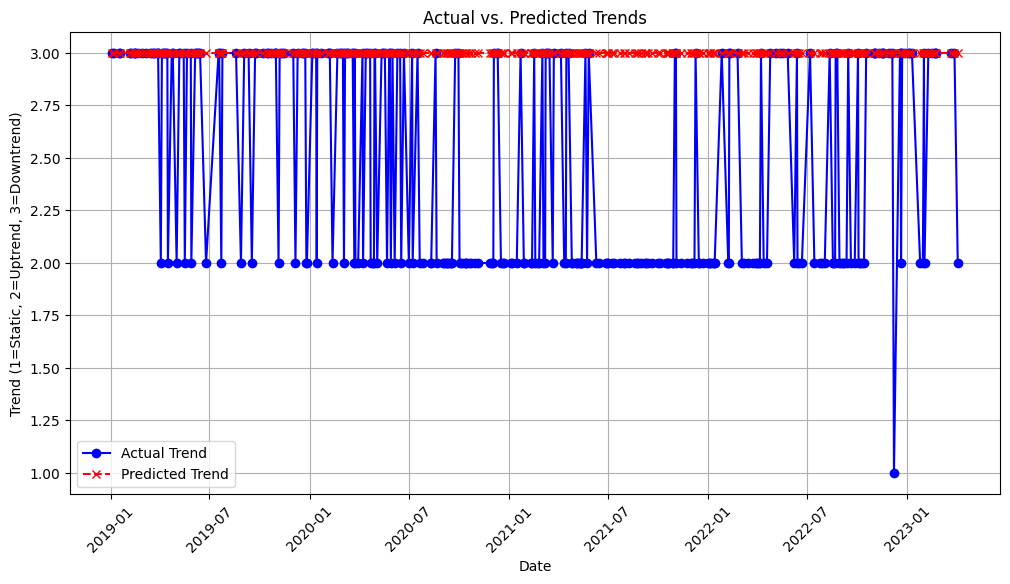

In [ ]:
import matplotlib.pyplot as plt

# Sort values by date for better visualization
df_test_sorted = df_test.sort_values(by='Date')

plt.figure(figsize=(12, 6))
plt.plot(df_test_sorted['Date'], df_test_sorted['Actual_Trend'], label='Actual Trend', marker='o', linestyle='-', color='blue')
plt.plot(df_test_sorted['Date'], df_test_sorted['Predicted_Trend'], label='Predicted Trend', marker='x', linestyle='--', color='red')

plt.xlabel('Date')
plt.ylabel('Trend (1=Static, 2=Uptrend, 3=Downtrend)')
plt.title('Actual vs. Predicted Trends')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


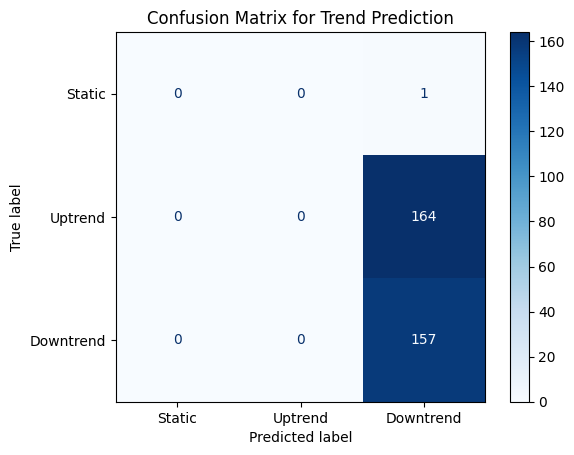

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute Confusion Matrix
cm = confusion_matrix(df_test['Actual_Trend'], df_test['Predicted_Trend'], labels=[1, 2, 3])

# Display the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Static', 'Uptrend', 'Downtrend'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Trend Prediction')
plt.show()


The low hit ratio of 48 percent suggests that the model is struggling to classify stock trends accurately. This could be due to too few frequent patterns, as only seven were found, meaning the training data lacks enough diversity to make good predictions. Another issue could be using k equals one in KNN, which makes the model too sensitive to noise; increasing k to three or five may improve stability. Additionally, the fuzzy c means clusters might not align well with actual trends, causing misclassification. The model also only uses symbolic indicators such as MACD, ROC, STO, and OBV, but adding their raw values as features may improve predictions. Lastly, if a single cluster dominates the predictions, the clustering parameters, such as increasing m to two point five instead of two, may need tuning. Testing these fixes step by step should help improve accuracy.